In [18]:
#Import Modules

import pandas as pd
import pandas as pd
import re, string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from textblob import TextBlob
import numpy as np
import os
import math
import matplotlib.pyplot as plt
from modules import confusion_matrix_pretty_print as cm

In [19]:
# Import Processed Data

df = pd.read_excel('02_Resources/Climate_change_links_2.xlsx')
print(df.shape)

df = df[df['Effectiveness'].notna()]
print(df.shape)

all_words = []
all_words_sent = []
arr_monogrm = []
arr_bigrm = []
arr_trigrm = []

for index, row in df.iterrows():
    if not (math.isnan(row['Effectiveness'])):
        col_list = ["0"]
        data = pd.read_csv('03_Processed_Comments/' + row['VideoID'] + '/' + row['VideoID'] + '_all_words.csv', usecols=col_list)
        
        all_words_sent.append(data['0'])
        all_words.append(" ".join(map(str, data['0'])))
        
        #Monograms
        nlp_words = nltk.FreqDist(data['0'])
        ten_most_freq = list(nlp_words)[:10]
        arr_monogrm.append(ten_most_freq)

        #Bigrams
        bigrm = list(nltk.bigrams(data['0']))
        nlp_words = nltk.FreqDist(bigrm)
        ten_most_freq = list(nlp_words)[:10]
        arr_bigrm.append(ten_most_freq)

        #Trigram
        trigrm = list(nltk.trigrams(data['0']))
        nlp_words = nltk.FreqDist(trigrm)
        ten_most_freq = list(nlp_words)[:10]
        arr_trigrm.append(ten_most_freq)
        
df['all_words'] = all_words
df['all_words_sent'] = all_words_sent

df['monogrm'] = arr_monogrm
df['bigrm'] = arr_bigrm
df['trigrm'] = arr_trigrm
        
# print(df['all_words'][0][0])

(190, 17)
(168, 17)


In [20]:
# Most Frequent Effective and Ineffective N-grams

# Effective N-grams
# ----------------------------------------------------------------------

print("Effective N-grams \n")
print("-------------------------------------------------- \n")

most_freq_eff_mono = df[df['Effectiveness2'] == 3]['monogrm'].explode().value_counts()[:20]
print (most_freq_eff_mono, "\n")

most_freq_eff_bi = df[df['Effectiveness2'] == 3]['bigrm'].explode().value_counts()[:20]
print (most_freq_eff_bi, "\n")

most_freq_eff_tri = df[df['Effectiveness2'] == 3]['trigrm'].explode().value_counts()[:20]
print (most_freq_eff_tri, "\n")

# Neuteral N-grams
# ----------------------------------------------------------------------

print("Neuteral N-grams \n")
print("-------------------------------------------------- \n")

most_freq_neutral_mono = df[df['Effectiveness2'] == 2]['monogrm'].explode().value_counts()[:20]
print (most_freq_neutral_mono, "\n")

most_freq_neutral_bi = df[df['Effectiveness2'] == 2]['bigrm'].explode().value_counts()[:20]
print (most_freq_neutral_bi, "\n")

most_freq_neutral_tri = df[df['Effectiveness2'] == 2]['trigrm'].explode().value_counts()[:20]
print (most_freq_neutral_tri)

# Ineffective N-grams
# ----------------------------------------------------------------------

print("Ineffective N-grams \n")
print("-------------------------------------------------- \n")

most_freq_ineff_mono = df[df['Effectiveness2'] == 1]['monogrm'].explode().value_counts()[:20]
print (most_freq_ineff_mono, "\n")

most_freq_ineff_bi = df[df['Effectiveness2'] == 1]['bigrm'].explode().value_counts()[:20]
print (most_freq_ineff_bi, "\n")

most_freq_ineff_tri = df[df['Effectiveness2'] == 1]['trigrm'].explode().value_counts()[:20]
print (most_freq_ineff_tri, "\n")

Effective N-grams 

-------------------------------------------------- 

climate        47
change         44
change_NEG     40
climate_NEG    40
people         30
people_NEG     26
make_NEG       21
make           18
dont           17
wa             17
video          14
like           13
say_NEG        12
year_NEG       11
warm_NEG       10
year           10
ha_NEG          7
warm            7
go              7
wa_NEG          6
Name: monogrm, dtype: int64 

(climate_NEG, change_NEG)    57
(climate, change)            57
(global, warm)               53
(global_NEG, warm_NEG)       42
(fossil_NEG, fuel_NEG)       28
(ice, age)                   16
(fossil, fuel)               14
(ice_NEG, age_NEG)           14
(year, ago)                  10
(plant, tree)                 8
(greenhouse_NEG, gas_NEG)     8
(year_NEG, ago_NEG)           7
(plant_NEG, tree_NEG)         5
(eat_NEG, meat_NEG)           5
(go, vegan)                   5
(dont, know_NEG)              4
(save, planet)           

Monogram 

--------------------------------------------------
Effective: 
 ['go', 'ha_NEG', 'video', 'warm_NEG', 'year', 'year_NEG'] 



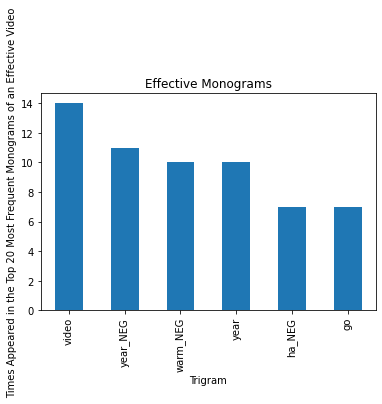

Ineffective: 
 ['get', 'ha', 'im', 'say', 'trump', 'u'] 



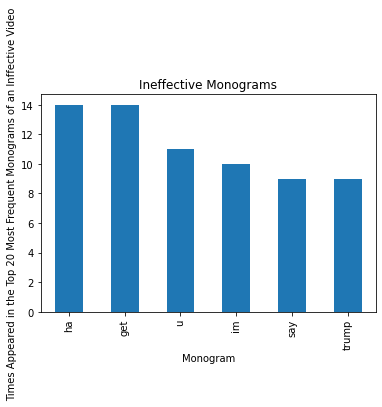

Bigram 

--------------------------------------------------
Effective: 
 [('dont_NEG', 'know_NEG'), ('eat_NEG', 'meat_NEG'), ('go', 'vegan'), ('greenhouse_NEG', 'gas_NEG'), ('nuclear', 'power'), ('plant_NEG', 'tree_NEG'), ('save', 'planet'), ('year', 'old'), ('year_NEG', 'ago_NEG')] 



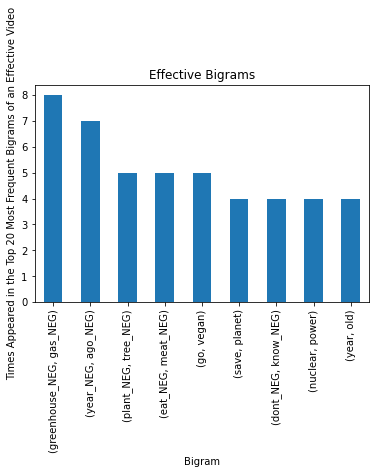

video       14
year_NEG    11
warm_NEG    10
year        10
ha_NEG       7
go           7
Name: monogrm, dtype: int64
Ineffective: 
 [('al', 'gore'), ('bill', 'gate'), ('bill_NEG', 'gate_NEG'), ('climate_NEG', 'scientist_NEG'), ('dont', 'think_NEG'), ('gon', 'na'), ('gon_NEG', 'na_NEG'), ('joe', 'biden'), ('look', 'like')] 



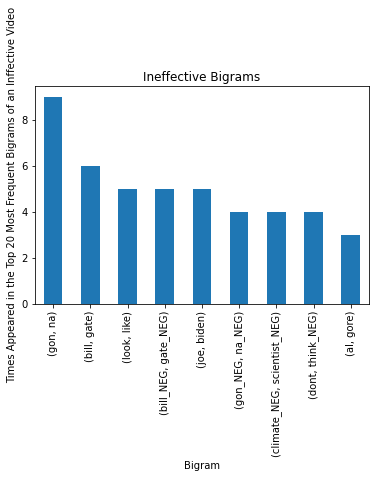

video       14
year_NEG    11
warm_NEG    10
year        10
ha_NEG       7
go           7
Name: monogrm, dtype: int64
Trigram 

--------------------------------------------------
Effective: 
 [('burn', 'fossil', 'fuel'), ('cause_NEG', 'climate_NEG', 'change_NEG'), ('cause_NEG', 'global_NEG', 'warm_NEG'), ('climate', 'change', 'hoax'), ('climate_NEG', 'change_NEG', 'denier_NEG'), ('deny_NEG', 'climate_NEG', 'change_NEG'), ('go', 'back', 'school'), ('million_NEG', 'year_NEG', 'ago_NEG'), ('nuclear', 'power', 'plant'), ('use_NEG', 'fossil_NEG', 'fuel_NEG')] 



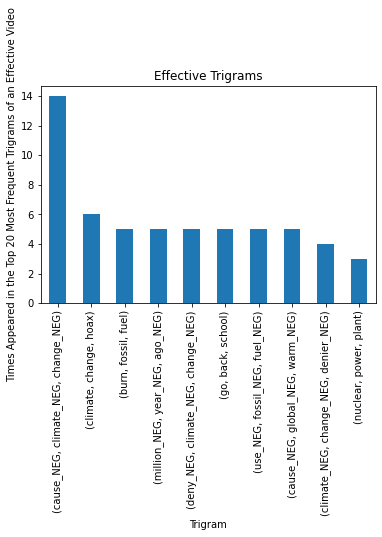

Ineffective: 
 [('barnola_NEG', 'et_NEG', 'al_NEG'), ('cause', 'climate', 'change'), ('fight', 'climate', 'change'), ('global', 'warm', 'real'), ('green', 'house', 'gas'), ('green', 'new', 'deal'), ('green_NEG', 'new_NEG', 'deal_NEG'), ('make', 'climate', 'change'), ('man', 'make', 'climate'), ('vostok_NEG', 'ice_NEG', 'core_NEG')] 



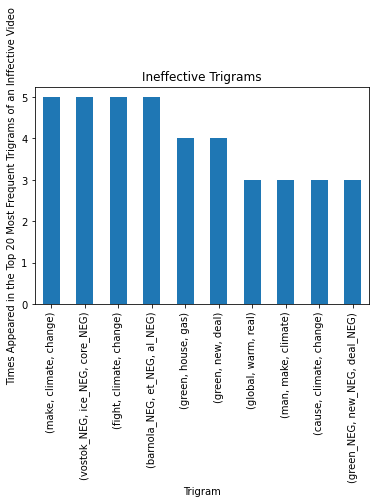

In [21]:
# Plots: Unique N-grams for Effective anf Ineffective Videos

# Monogram
# ----------------------------------------------------------------------
# Effective

eff_mono = most_freq_eff_mono.index.difference(most_freq_ineff_mono.index)
print("Monogram \n")
print("--------------------------------------------------")
print("Effective: \n", eff_mono.tolist() , "\n")

plt.figure()
most_freq_eff_mono[most_freq_eff_mono.index.isin(eff_mono.tolist())].plot(kind='bar', title='Effective Monograms')
plt.xlabel('Trigram')
plt.ylabel('Times Appeared in the Top 20 Most Frequent Monograms of an Effective Video')
plt.show()

# Ineffective

ineff_mono = most_freq_ineff_mono.index.difference(most_freq_eff_mono.index)
print("Ineffective: \n", ineff_mono.tolist() , "\n")

plt.figure()
most_freq_ineff_mono[most_freq_ineff_mono.index.isin(ineff_mono.tolist())].plot(kind='bar', title='Ineffective Monograms')
plt.xlabel('Monogram')
plt.ylabel('Times Appeared in the Top 20 Most Frequent Monograms of an Inffective Video')
plt.show()

# Bigram
# ----------------------------------------------------------------------
# Effective

eff_bi = most_freq_eff_bi.index.difference(most_freq_ineff_bi.index)
print("Bigram \n")
print("--------------------------------------------------")
print("Effective: \n", eff_bi.tolist() , "\n")

plt.figure()
most_freq_eff_bi[most_freq_eff_bi.index.isin(eff_bi.tolist())].plot(kind='bar', title='Effective Bigrams')
plt.xlabel('Bigram')
plt.ylabel('Times Appeared in the Top 20 Most Frequent Bigrams of an Effective Video')
plt.show()
print(most_freq_eff_mono[most_freq_eff_mono.index.isin(eff_mono.tolist())])

# Ineffective

ineff_bi = most_freq_ineff_bi.index.difference(most_freq_eff_bi.index)
print("Ineffective: \n", ineff_bi.tolist() , "\n")

plt.figure()
most_freq_ineff_bi[most_freq_ineff_bi.index.isin(ineff_bi.tolist())].plot(kind='bar', title='Ineffective Bigrams')
plt.xlabel('Bigram')
plt.ylabel('Times Appeared in the Top 20 Most Frequent Bigrams of an Inffective Video')
plt.show()
print(most_freq_eff_mono[most_freq_eff_mono.index.isin(eff_mono.tolist())])

# Trigram
# ----------------------------------------------------------------------
# Effective

eff_tri = most_freq_eff_tri.index.difference(most_freq_ineff_tri.index)
print("Trigram \n")
print("--------------------------------------------------")
print("Effective: \n", eff_tri.tolist() , "\n")

plt.figure()
most_freq_eff_tri[most_freq_eff_tri.index.isin(eff_tri.tolist())].plot(kind='bar', title='Effective Trigrams')
plt.xlabel('Trigram')
plt.ylabel('Times Appeared in the Top 20 Most Frequent Trigrams of an Effective Video')
plt.show()

# Ineffective

ineff_tri = most_freq_ineff_tri.index.difference(most_freq_eff_tri.index)
print("Ineffective: \n", ineff_tri.tolist() , "\n")

plt.figure()
most_freq_ineff_tri[most_freq_ineff_tri.index.isin(ineff_tri.tolist())].plot(kind='bar', title='Ineffective Trigrams')
plt.xlabel('Trigram')
plt.ylabel('Times Appeared in the Top 20 Most Frequent Trigrams of an Inffective Video')
plt.show()

Climate Change


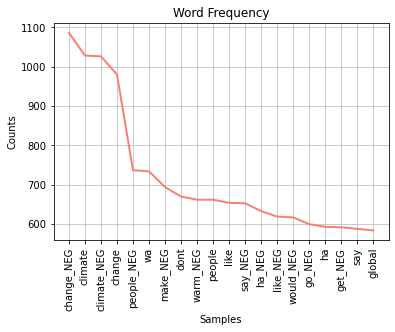

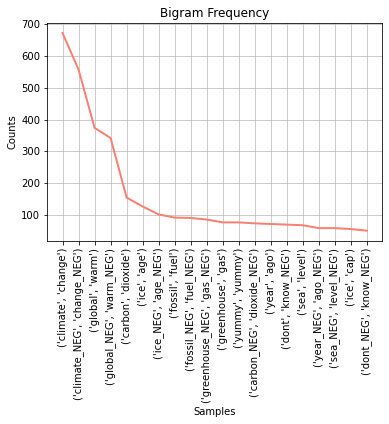

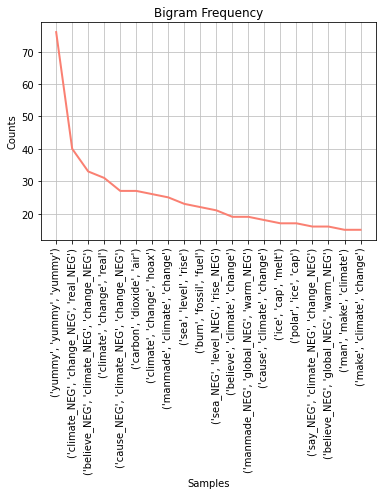

NameError: name 'first_three' is not defined

In [22]:
index = 100

print(df['Name of the video'][index])

nlp_words = nltk.FreqDist(df['all_words_sent'][index])
plot1 = nlp_words.plot(20, color='salmon', title='Word Frequency')

#Bigrams
bigrm = list(nltk.bigrams(df['all_words_sent'][index]))
words_2 = nltk.FreqDist(bigrm)
words_2.plot(20, color='salmon', title='Bigram Frequency')

#Trigram
trigrm = list(nltk.trigrams(df['all_words_sent'][index]))
words_2 = nltk.FreqDist(trigrm)
words_2.plot(20, color='salmon', title='Bigram Frequency')


ten_most_freq = list(words_2)[:10]
print(first_three)
print(df['all_words_sent'][1][4])

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [5]:
# split training and test set
X = df['all_words']
y = df['Effectiveness2']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# String to Record Outputs
stringTemp = ""

Training Data
1.0
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        48
         2.0       1.00      1.00      1.00        28
         3.0       1.00      1.00      1.00        41

    accuracy                           1.00       117
   macro avg       1.00      1.00      1.00       117
weighted avg       1.00      1.00      1.00       117

Testing Data
0.5882352941176471
              precision    recall  f1-score   support

         1.0       0.73      0.50      0.59        22
         2.0       0.27      0.30      0.29        10
         3.0       0.64      0.84      0.73        19

    accuracy                           0.59        51
   macro avg       0.55      0.55      0.54        51
weighted avg       0.61      0.59      0.58        51



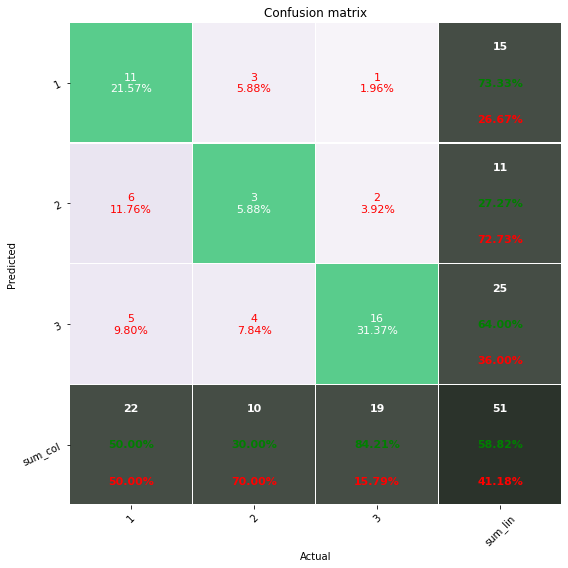

In [6]:
# SGDClassifier

bow = CountVectorizer(ngram_range=(2, 6))
tfidf = TfidfTransformer()
classifier = SGDClassifier()

pipeline = Pipeline([
    ('bow', bow),  # strings to token integer counts
    ('tfidf', tfidf),  # integer counts to weighted TF-IDF scores
    ('classifier', classifier),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

pipeline.fit(X_train,Y_train)

print("Training Data");
print("==========================================");
print(pipeline.score(X_train,Y_train));
all_predictions = pipeline.predict(X_train)
print(classification_report(Y_train, all_predictions))

print("Testing Data");
print("==========================================");
pipeScore = pipeline.score(X_test,Y_test)
print(pipeScore);
stringTemp += "SGDClassifier" + " -> " + str(pipeScore) + "\n"
all_predictions = pipeline.predict(X_test)
print(classification_report(Y_test, all_predictions))

#importing confusion matrix
confusion = confusion_matrix(Y_test, all_predictions)

#get pandas dataframe
df_cm = pd.DataFrame(confusion, index=range(1,4), columns=range(1,4))
#colormap: see this and choose your more dear
cmap = 'PuRd'
cm.pretty_plot_confusion_matrix(df_cm, cmap=cmap)

Training Data
1.0
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        48
         2.0       1.00      1.00      1.00        28
         3.0       1.00      1.00      1.00        41

    accuracy                           1.00       117
   macro avg       1.00      1.00      1.00       117
weighted avg       1.00      1.00      1.00       117

Testing Data
0.5882352941176471


C:\Users\Byron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         1.0       0.80      0.55      0.65        22
         2.0       0.00      0.00      0.00        10
         3.0       0.50      0.95      0.65        19

    accuracy                           0.59        51
   macro avg       0.43      0.50      0.43        51
weighted avg       0.53      0.59      0.52        51



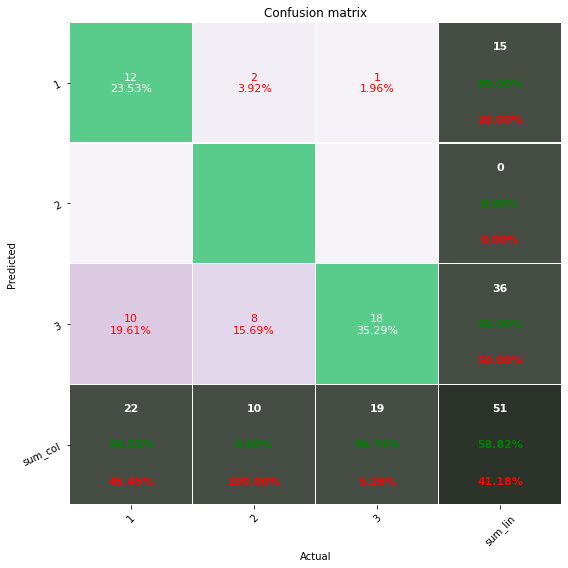

In [7]:
# MultinomialNB

bow = CountVectorizer(ngram_range=(2, 6))
tfidf = TfidfTransformer()
classifier = MultinomialNB()

pipeline = Pipeline([
    ('bow', bow),  # strings to token integer counts
    ('tfidf', tfidf),  # integer counts to weighted TF-IDF scores
    ('classifier', classifier),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

pipeline.fit(X_train,Y_train)

print("Training Data");
print("==========================================");
print(pipeline.score(X_train,Y_train));
all_predictions = pipeline.predict(X_train)
print(classification_report(Y_train, all_predictions))

print("Testing Data");
print("==========================================");
pipeScore = pipeline.score(X_test,Y_test)
print(pipeScore);
stringTemp += "MultinomialNB" + " -> " + str(pipeScore) + "\n"
all_predictions = pipeline.predict(X_test)
print(classification_report(Y_test, all_predictions))

#importing confusion matrix
confusion = confusion_matrix(Y_test, all_predictions)

#get pandas dataframe
df_cm = pd.DataFrame(confusion, index=range(1,4), columns=range(1,4))
#colormap: see this and choose your more dear
cmap = 'PuRd'
cm.pretty_plot_confusion_matrix(df_cm, cmap=cmap)

Training Data
1.0
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        48
         2.0       1.00      1.00      1.00        28
         3.0       1.00      1.00      1.00        41

    accuracy                           1.00       117
   macro avg       1.00      1.00      1.00       117
weighted avg       1.00      1.00      1.00       117

Testing Data
0.5490196078431373
              precision    recall  f1-score   support

         1.0       0.51      0.95      0.67        22
         2.0       0.00      0.00      0.00        10
         3.0       0.70      0.37      0.48        19

    accuracy                           0.55        51
   macro avg       0.40      0.44      0.38        51
weighted avg       0.48      0.55      0.47        51



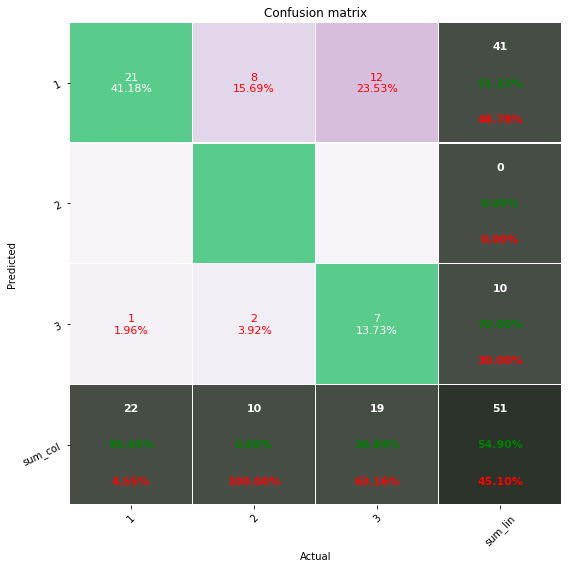

In [8]:
# SVC

bow = CountVectorizer(ngram_range=(2, 6))
tfidf = TfidfTransformer()
classifier = SVC()

pipeline = Pipeline([
    ('bow', bow),  # strings to token integer counts
    ('tfidf', tfidf),  # integer counts to weighted TF-IDF scores
    ('classifier', classifier),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

pipeline.fit(X_train,Y_train)

print("Training Data");
print("==========================================");
print(pipeline.score(X_train,Y_train)); 
all_predictions = pipeline.predict(X_train)
print(classification_report(Y_train, all_predictions))

print("Testing Data");
print("==========================================");
pipeScore = pipeline.score(X_test,Y_test)
print(pipeScore);
stringTemp += "SVC" + " -> " + str(pipeScore) + "\n"
all_predictions = pipeline.predict(X_test)
print(classification_report(Y_test, all_predictions))

#importing confusion matrix
confusion = confusion_matrix(Y_test, all_predictions)

#get pandas dataframe
df_cm = pd.DataFrame(confusion, index=range(1,4), columns=range(1,4))
#colormap: see this and choose your more dear
cmap = 'PuRd'
cm.pretty_plot_confusion_matrix(df_cm, cmap=cmap)

Training Data
1.0
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        48
         2.0       1.00      1.00      1.00        28
         3.0       1.00      1.00      1.00        41

    accuracy                           1.00       117
   macro avg       1.00      1.00      1.00       117
weighted avg       1.00      1.00      1.00       117

Testing Data
0.5882352941176471
              precision    recall  f1-score   support

         1.0       0.80      0.55      0.65        22
         2.0       0.00      0.00      0.00        10
         3.0       0.50      0.95      0.65        19

    accuracy                           0.59        51
   macro avg       0.43      0.50      0.43        51
weighted avg       0.53      0.59      0.52        51



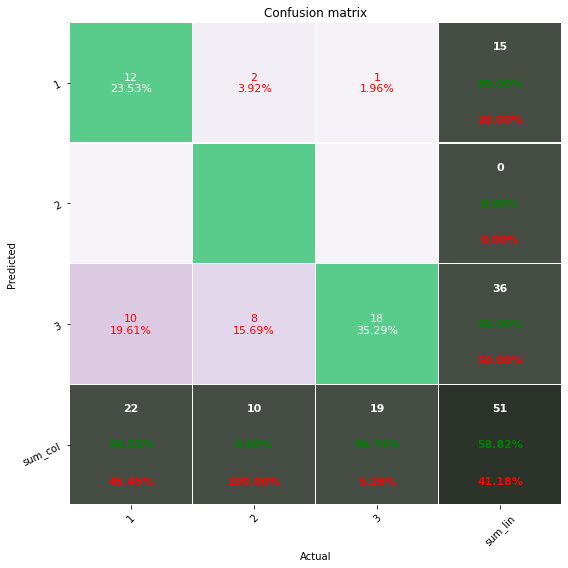

In [9]:
# LinearSVC

bow = CountVectorizer(ngram_range=(2, 6))
tfidf = TfidfTransformer()
classifier = LinearSVC()

pipeline = Pipeline([
    ('bow', bow),  # strings to token integer counts
    ('tfidf', tfidf),  # integer counts to weighted TF-IDF scores
    ('classifier', classifier),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

pipeline.fit(X_train,Y_train)

print("Training Data");
print("==========================================");
print(pipeline.score(X_train,Y_train)); 
all_predictions = pipeline.predict(X_train)
print(classification_report(Y_train, all_predictions))

print("Testing Data");
print("==========================================");
pipeScore = pipeline.score(X_test,Y_test)
print(pipeScore);
stringTemp += "LinearSVC" + " -> " + str(pipeScore) + "\n"
all_predictions = pipeline.predict(X_test)
print(classification_report(Y_test, all_predictions))

#importing confusion matrix
confusion = confusion_matrix(Y_test, all_predictions)

#get pandas dataframe
df_cm = pd.DataFrame(confusion, index=range(1,4), columns=range(1,4))
#colormap: see this and choose your more dear
cmap = 'PuRd'
cm.pretty_plot_confusion_matrix(df_cm, cmap=cmap)

Training Data
1.0
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        48
         2.0       1.00      1.00      1.00        28
         3.0       1.00      1.00      1.00        41

    accuracy                           1.00       117
   macro avg       1.00      1.00      1.00       117
weighted avg       1.00      1.00      1.00       117

Testing Data
0.37254901960784315


C:\Users\Byron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         1.0       0.41      0.32      0.36        22
         2.0       0.00      0.00      0.00        10
         3.0       0.35      0.63      0.45        19

    accuracy                           0.37        51
   macro avg       0.25      0.32      0.27        51
weighted avg       0.31      0.37      0.32        51



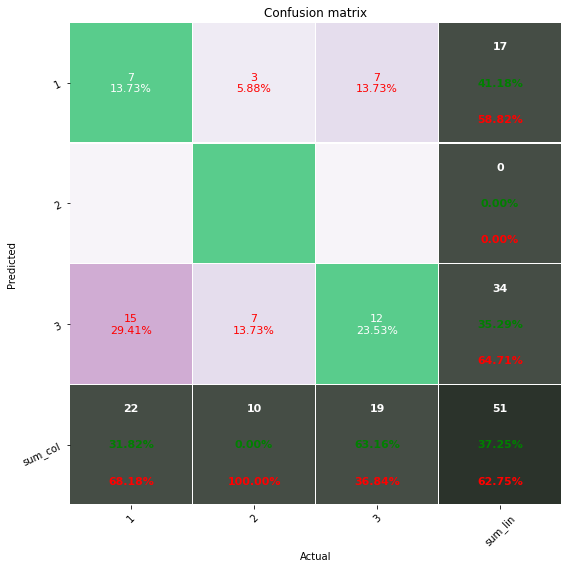

In [10]:
# RandomForestClassifier

bow = CountVectorizer(ngram_range=(2, 6))
tfidf = TfidfTransformer()
classifier = RandomForestClassifier()

pipeline = Pipeline([
    ('bow', bow),  # strings to token integer counts
    ('tfidf', tfidf),  # integer counts to weighted TF-IDF scores
    ('classifier', classifier),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

pipeline.fit(X_train,Y_train)

print("Training Data");
print("==========================================");
print(pipeline.score(X_train,Y_train));
all_predictions = pipeline.predict(X_train)
print(classification_report(Y_train, all_predictions))

print("Testing Data");
print("==========================================");
pipeScore = pipeline.score(X_test,Y_test)
print(pipeScore);
stringTemp += "RandomForestClassifier" + " -> " + str(pipeScore) + "\n"
all_predictions = pipeline.predict(X_test)
print(classification_report(Y_test, all_predictions))

#importing confusion matrix
confusion = confusion_matrix(Y_test, all_predictions)

#get pandas dataframe
df_cm = pd.DataFrame(confusion, index=range(1,4), columns=range(1,4))
#colormap: see this and choose your more dear
cmap = 'PuRd'
cm.pretty_plot_confusion_matrix(df_cm, cmap=cmap)

Training Data
1.0
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        48
         2.0       1.00      1.00      1.00        28
         3.0       1.00      1.00      1.00        41

    accuracy                           1.00       117
   macro avg       1.00      1.00      1.00       117
weighted avg       1.00      1.00      1.00       117

Testing Data
0.5098039215686274
              precision    recall  f1-score   support

         1.0       0.67      0.45      0.54        22
         2.0       0.14      0.10      0.12        10
         3.0       0.52      0.79      0.62        19

    accuracy                           0.51        51
   macro avg       0.44      0.45      0.43        51
weighted avg       0.51      0.51      0.49        51



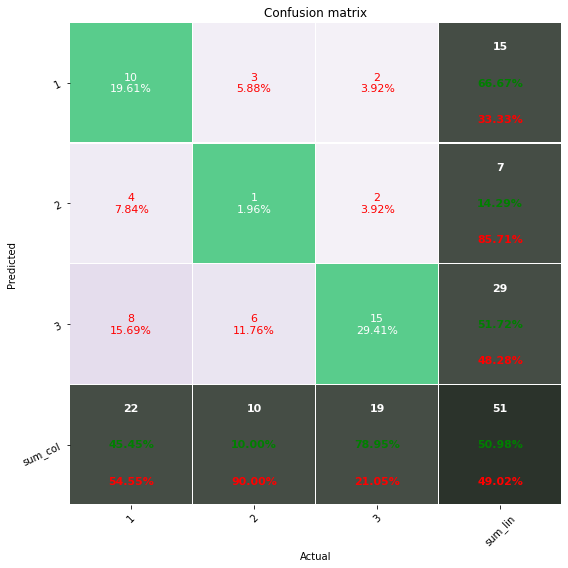

In [11]:
# LogisticRegression

bow = CountVectorizer(ngram_range=(2, 6))
tfidf = TfidfTransformer()
classifier = LogisticRegression(n_jobs=1, C=100000.0, penalty='l1', solver='liblinear', random_state=12)

pipeline = Pipeline([
    ('bow', bow),  # strings to token integer counts
    ('tfidf', tfidf),  # integer counts to weighted TF-IDF scores
    ('classifier', classifier),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

pipeline.fit(X_train,Y_train)

print("Training Data");
print("==========================================");
print(pipeline.score(X_train,Y_train));
all_predictions = pipeline.predict(X_train)
print(classification_report(Y_train, all_predictions))

print("Testing Data");
print("==========================================");
pipeScore = pipeline.score(X_test,Y_test)
print(pipeScore);
stringTemp += "LogisticRegression" + " -> " + str(pipeScore) + "\n"
all_predictions = pipeline.predict(X_test)
print(classification_report(Y_test, all_predictions))

#importing confusion matrix
confusion = confusion_matrix(Y_test, all_predictions)

#get pandas dataframe
df_cm = pd.DataFrame(confusion, index=range(1,4), columns=range(1,4))
#colormap: see this and choose your more dear
cmap = 'PuRd'
cm.pretty_plot_confusion_matrix(df_cm, cmap=cmap)

Training Data
0.6068376068376068
              precision    recall  f1-score   support

         1.0       0.96      0.46      0.62        48
         2.0       0.75      0.32      0.45        28
         3.0       0.49      0.98      0.65        41

    accuracy                           0.61       117
   macro avg       0.73      0.59      0.57       117
weighted avg       0.74      0.61      0.59       117

Testing Data
0.37254901960784315
              precision    recall  f1-score   support

         1.0       0.67      0.09      0.16        22
         2.0       0.12      0.10      0.11        10
         3.0       0.40      0.84      0.54        19

    accuracy                           0.37        51
   macro avg       0.40      0.34      0.27        51
weighted avg       0.46      0.37      0.29        51



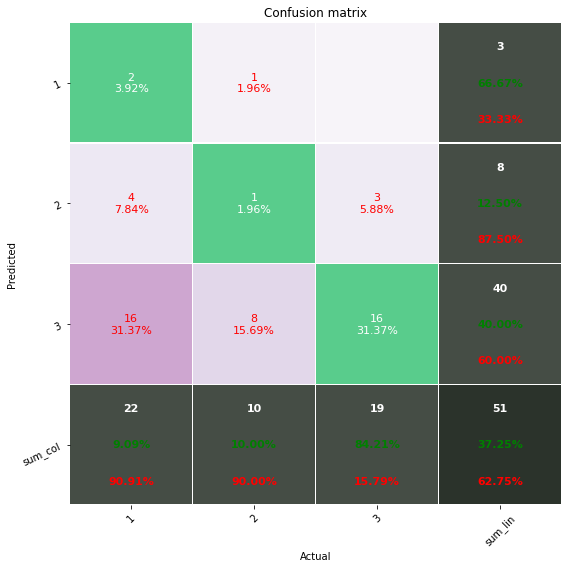

In [12]:
# KNeighborsClassifier

bow = CountVectorizer(ngram_range=(2, 6))
tfidf = TfidfTransformer()
classifier = KNeighborsClassifier()

pipeline = Pipeline([
    ('bow', bow),  # strings to token integer counts
    ('tfidf', tfidf),  # integer counts to weighted TF-IDF scores
    ('classifier', classifier),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

pipeline.fit(X_train,Y_train)

print("Training Data");
print("==========================================");
print(pipeline.score(X_train,Y_train));
all_predictions = pipeline.predict(X_train)
print(classification_report(Y_train, all_predictions))

print("Testing Data");
print("==========================================");
pipeScore = pipeline.score(X_test,Y_test)
print(pipeScore);
stringTemp += "KNeighborsClassifier" + " -> " + str(pipeScore) + "\n"
all_predictions = pipeline.predict(X_test)
print(classification_report(Y_test, all_predictions))

#importing confusion matrix
confusion = confusion_matrix(Y_test, all_predictions)

#get pandas dataframe
df_cm = pd.DataFrame(confusion, index=range(1,4), columns=range(1,4))
#colormap: see this and choose your more dear
cmap = 'PuRd'
cm.pretty_plot_confusion_matrix(df_cm, cmap=cmap)

In [13]:
# GradientBoostingClassifier

# bow = CountVectorizer(ngram_range=(2, 6))
# tfidf = TfidfTransformer()
# classifier = GradientBoostingClassifier()

# pipeline = Pipeline([
#     ('bow', bow),  # strings to token integer counts
#     ('tfidf', tfidf),  # integer counts to weighted TF-IDF scores
#     ('classifier', classifier),  # train on TF-IDF vectors w/ Naive Bayes classifier
# ])

# pipeline.fit(X_train,Y_train)

# print("Training Data");
# print("==========================================");
# print(pipeline.score(X_train,Y_train));
# all_predictions = pipeline.predict(X_train)
# print(classification_report(Y_train, all_predictions))

# print("Testing Data");
# print("==========================================");
# pipeScore = pipeline.score(X_test,Y_test)
# print(pipeScore);
# stringTemp += "GradientBoostingClassifier" + " -> " + str(pipeScore) + "\n"
# all_predictions = pipeline.predict(X_test)
# print(classification_report(Y_test, all_predictions))

# #importing confusion matrix
# confusion = confusion_matrix(Y_test, all_predictions)

# #get pandas dataframe
# df_cm = pd.DataFrame(confusion, index=range(1,4), columns=range(1,4))
# #colormap: see this and choose your more dear
# cmap = 'PuRd'
# cm.pretty_plot_confusion_matrix(df_cm, cmap=cmap)

In [14]:
with open('04_Recorded_Results/Results.txt', 'w') as f:
    f.write(stringTemp)